   Date(UTC)  UnixTimeStamp  BlockSize  AvgGasPrices  GasUsed  GasLimit  \
0  7/30/2015   1.438214e+09      644.0           0.0      0.0       0.0   
1  7/31/2015   1.438301e+09      582.0           0.0      0.0       0.0   
2   8/1/2015   1.438387e+09      575.0           0.0      0.0       0.0   
3   8/2/2015   1.438474e+09      581.0           0.0      0.0       0.0   
4   8/3/2015   1.438560e+09      587.0           0.0      0.0       0.0   

   BlockTime  NetworkUtilization  TransactionFees  BlockDifficulty  \
0       4.46                 0.0              0.0            0.121   
1      12.58                 0.0              0.0            0.603   
2      16.34                 0.0              0.0            0.887   
3      16.12                 0.0              0.0            1.020   
4      16.37                 0.0              0.0            1.126   

   NetworkHash  EtherSupply  MarketCap  AddressCount  Price  EthereumGTrends  \
0      11.5297  72049306.59        0.0        92

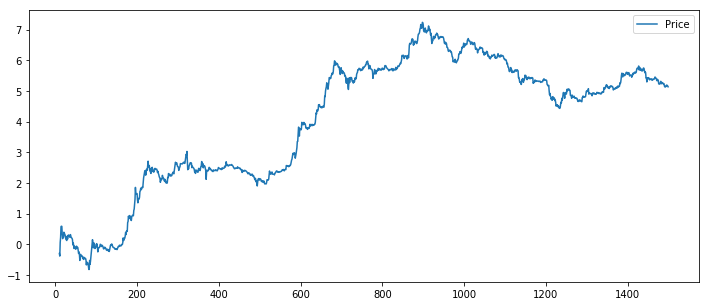

<Figure size 432x288 with 0 Axes>

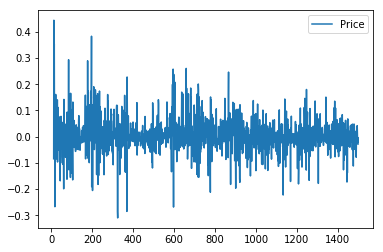

<Figure size 432x288 with 0 Axes>

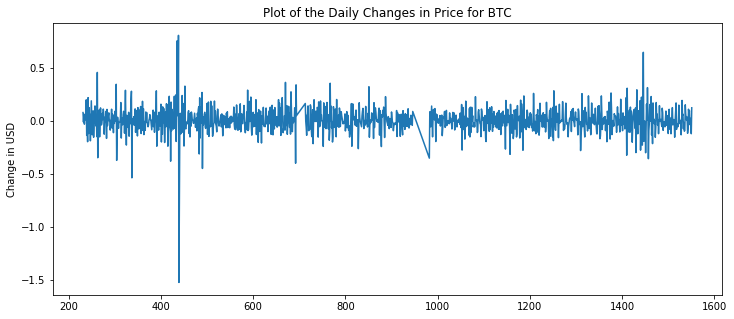

MissingDataError: ('exog contains inf or nans', 'occurred at index UnixTimeStamp')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
tmp = pd.read_csv('Dataset.csv')
print(tmp.head())
# tmp2 = tmp[['Date(UTC)','Price']]
# tmp2['day'] = pd.to_datetime(tmp2['Date(UTC)'], format = "%m/%d/%Y")
# print(tmp2['day'])
# print(tmp2.head())
# tmp2[0:1552].plot()
# plt.figure()
# pd.plotting.autocorrelation_plot(tmp2[0:1552])
tmp['Date(UTC)'] = pd.to_datetime(tmp['Date(UTC)'])
# tmp2 = tmp[['Date','Price']]
print(tmp.corr(method='pearson'))
tmp.dropna()
# Converting the data to a logarithmic scale
eth_log = pd.DataFrame(np.log(tmp[10:1500].Price)).dropna()
eth_log.plot(figsize=(12,5))
plt.figure()
# Differencing the log values
et_log = pd.DataFrame(np.log(tmp[10:1500].Price))

# Differencing the log values
lo_diff = et_log.diff().dropna()
lo_diff.plot()
plt.figure()
eth_log = tmp.loc[:, ~tmp.columns.isin(['EthereumGTrends','Date(UTC)'])][10:1552].apply(np.log).dropna()
log_data = eth_log.diff()
#print(log_data.Price[15],lo_diff[15])
plt.figure()
log_data.BlockSize.plot(figsize=(12,5))
plt.title('Plot of the Daily Changes in Price for BTC')
plt.ylabel('Change in USD')
plt.show()

log_data.corr(method='pearson')
results = log_data.apply(adfuller)


plt.figure()
log_data.Price.plot()
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,8))
plot_acf(lo_diff, ax=ax1, lags=150)
plot_pacf(lo_diff, ax=ax2, lags=150)
plt.savefig('acfpacf.png')
plt.show()